<a href="https://colab.research.google.com/github/MustangYun/BestNormalize/blob/master/BERT_%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%8B%A8%EC%9D%BC_%EB%AC%B8%EC%9E%A5_%EB%B6%84%EB%A5%98_Test_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

원문 출처 : https://raki-1203.github.io/boostcamp_ai_tech/week_9/03.-single-sentence-classification-based-BERT-train/

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.6 MB/s eta 0:00:00


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import torch
import datasets
import sys

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# 사용가능한 dataset list 불러오기
dataset_list = datasets.list_datasets()

# dataset list 확인
for datas in dataset_list:
    if 'ko' in datas:
        print(datas)

kor_3i4k
kor_hate
kor_ner
kor_nli
kor_nlu
kor_qpair
kor_sae
kor_sarcasm
squad_kor_v1
squad_kor_v2
AI-it/korean-hate-speech
Jack0508/TED2020_kor
Jack0508/TED2020vi_kor
Jack0508/vi-ko-TED-txt
KETI-AIR/kor_corpora
KETI-AIR/korquad
NikolajW/NPS_nonNormalized-Cased
Sabokou/qg_squad_modified
Sabokou/qg_squad_modified_dev
Sakonii/nepalitext-language-model-dataset
abwicke/koplo
cyko/books
dennlinger/klexikon
huggingartists/aikko
huggingartists/boris-grebenshikov
huggingartists/kojey-radical
huggingartists/krept-and-konan-bugzy-malone-sl-morisson-abra-cadabra-rv-and-snap-capone
huggingartists/lyapis-trubetskoy
huggingartists/max-korzh
imvladikon/knesset_meetings_corpus
kowndinya23/bert-dataset
kresnik/zeroth_korean
larcane/ko-WIT
mariosasko/dummy_test
mariosasko/test_multi_dir_dataset
msarmi9/korean-english-multitarget-ted-talks-task
nykodmar/cs_corpora_parliament_processed
poperson1205/mrtydi-v1.1-korean-fixed
roskoN/dailydialog
roskoN/dstc8-reddit-corpus
tesemnikov-av/toxic_dataset_classifica

In [ ]:
# nsmc 데이터 로드
dataset = datasets.load_dataset('nsmc') # nsmc, hate, sarcasm

# 데이터셋 구조 확인
print(dataset)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/150000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset nsmc downloaded and prepared to /root/.cache/huggingface/datasets/nsmc/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})


dataloader 로 가기전의 전단계를 만들기 위해 다루기 편하게 pandas 를 이용해서 DataFrame 형태로 저장

In [ ]:
import pandas as pd

# 필요한 데이터인 document와 label 정보만 pandas라이브러리 DataFrame 형식으로 변환
train_data = pd.DataFrame({"document":dataset['train']['document'], "label":dataset['train']['label'],})
test_data = pd.DataFrame({"document":dataset['test']['document'], "label":dataset['test']['label'],})

# 데이터셋 갯수 확인
print('학습 데이터셋 : {}'.format(len(train_data)))
print('테스트 데이터셋 : {}'.format(len(test_data)))

학습 데이터셋 : 150000
테스트 데이터셋 : 50000


In [ ]:
# 데이터셋 내용 확인
train_data[:5]

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


전처리 단계 중에 하나인 데이터 중복을 제거하고 outlier 데이터 삭제하고 label 이 0 과 1 인데 오탈자가나서 3이 있다 이런 것들을 삭제해야 함

이런 것들을 진행하는게 데이터 전처리 과정

In [ ]:
# 데이터 중복을 제외한 갯수 확인
print("학습데이터 : ",train_data['document'].nunique()," 라벨 : ",train_data['label'].nunique())
print("데스트 데이터 : ",test_data['document'].nunique()," 라벨 : ",test_data['label'].nunique())

# 중복 데이터 제거
train_data.drop_duplicates(subset=['document'], inplace= True)
test_data.drop_duplicates(subset=['document'], inplace= True)

# 데이터셋 갯수 확인
print('중복 제거 후 학습 데이터셋 : {}'.format(len(train_data)))
print('중복 제거 후 테스트 데이터셋 : {}'.format(len(test_data)))

학습데이터 :  146183  라벨 :  2
데스트 데이터 :  49158  라벨 :  2
중복 제거 후 학습 데이터셋 : 146183
중복 제거 후 테스트 데이터셋 : 49158


unique() 를 사용해서 개수를 보니 150000개보다 줄어들어서 중복 데이터가 있다는 것을 알 수 있음

그 다음엔 null 데이터를 제거

In [ ]:
import numpy as np

# null 데이터 제거
train_data['document'].replace('', np.nan, inplace=True)
test_data['document'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how = 'any')
test_data = test_data.dropna(how = 'any')

print('null 제거 후 학습 데이터셋 : {}'.format(len(train_data)))
print('null 제거 후 테스트 데이터셋 : {}'.format(len(test_data)))

null 제거 후 학습 데이터셋 : 146182
null 제거 후 테스트 데이터셋 : 49157


In [ ]:
print(train_data['document'][0])
print(train_data['label'][0])

아 더빙.. 진짜 짜증나네요 목소리
0


outlier 를 제거 과정

학습 문장의 최대 길이와 평균 길이를 구하고 이 sentence 들의 histogram 확인

학습 문장 최대 길이 : 146
학습 문장의 평균 길이 : 35.981338331668745


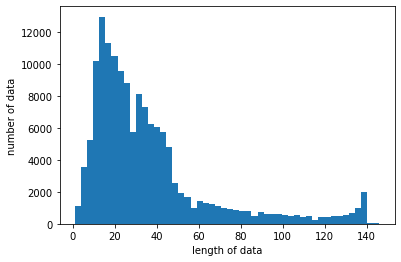

In [ ]:
from matplotlib import pyplot as plt

#학습 리뷰 길이조사
print('학습 문장 최대 길이 :',max(len(l) for l in train_data['document']))
print('학습 문장의 평균 길이 :',sum(map(len, train_data['document']))/len(train_data['document']))

plt.hist([len(s) for s in train_data['document']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

학습에 사용될 pre-trained 된 BERT 모델을 가져옴

In [ ]:
# Store the model we want to use
from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME = "snunlp/KR-BERT-char16424"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

토크나이저 준비

In [ ]:
tokenized_train_sentences = tokenizer(
    list(train_data['document']),
    return_tensors="pt",
    padding=True,
    truncation=True,
    add_special_tokens=True,
    )

print(tokenized_train_sentences[0])
print(tokenized_train_sentences[0].tokens)
print(tokenized_train_sentences[0].ids)
print(tokenized_train_sentences[0].attention_mask)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Encoding(num_tokens=142, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '아', '더', '##빙', '.', '.', '진짜', '짜', '##증', '##나', '##네요', '목소리', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[

test 를 위한 tokenized 된 data 생성

In [ ]:
tokenized_test_sentences = tokenizer(
    list(test_data['document']),
    return_tensors="pt",
    padding=True,
    truncation=True,
    add_special_tokens=True,
    )

In [ ]:
train_label = train_data['label'].values
test_label = test_data['label'].values

print(train_label[0])

0


이렇게 sentence, label 을 준비해놓고

이걸 실제 모델에 입력하기 위한 구조적인 형태로 만들어 줄 거임

hugging face 가 만든 것이기 때문에 tokenizer 에서 나온 class 정보 key, value 랑 모델에 들어가는 key, value 랑 서로 일치하게 됨

In [ ]:
class SingleSentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

dataset 에는 getitem 이라는 함수가 있는데 학습이 진행되면 매 step 이 진행이 될 거고 이것이 배치단위로 동작하게 되는데 그 step 에 맞는 데이터셋을 모델에 가져오게 되는게 바로 이 getitem 함수를 통해서 가져오게 됨

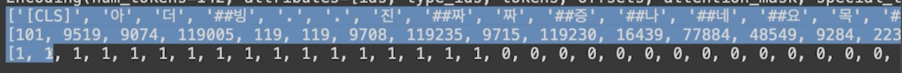

이 3가지 정보가 전달이 되어야 하는데 이 3가지가 전부 key, value 형태로 구성이 되어있고 모델에는 그 key, value 가 그대로 들어가면 됨

In [ ]:
train_dataset = SingleSentDataset(tokenized_train_sentences, train_label)
test_dataset = SingleSentDataset(tokenized_test_sentences, test_label)

tokenized_train_sentences 와 train_label 을 파라미터로 넣어서 dataset class 를 통해서 dataset 을 만들어 줌

BertForSequenceClassification 이라는걸 제공해줌

문장 분류를 위해서는 BERT 위에 Classification 위에 head 를 부착해야 하는데 이걸 transformers 에서 제공

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

In [ ]:
# 파라미터 설정
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=500,
    save_steps=500,
    save_total_limit=2
)

In [ ]:
model = BertForSequenceClassification.from_pretrained(MODEL_NAME)
model.to(device)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
)

Some weights of the model checkpoint at snunlp/KR-BERT-char16424 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkp

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 146182
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4569
  Number of trainable parameters = 98656514
<ipython-input-16-7a16a6e720f8>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss
500,0.445100
1000,0.343800
1500,0.316800
2000,0.303900
2500,0.286900
3000,0.278600
3500,0.270000
4000,0.265800
4500,0.256900


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
<ipython-input-16-7a16a6e720f8>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
<ipython-input-16-7a16a6e720f8>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Saving model checkpoint

TrainOutput(global_step=4569, training_loss=0.30687152355759323, metrics={'train_runtime': 3233.04, 'train_samples_per_second': 45.215, 'train_steps_per_second': 1.413, 'total_flos': 1.066722312859032e+16, 'train_loss': 0.30687152355759323, 'epoch': 1.0})

성능 평가를 위한 함수

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.evaluate(eval_dataset=test_dataset)

***** Running Evaluation *****
  Num examples = 49157
  Batch size = 64
<ipython-input-16-7a16a6e720f8>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.25154295563697815,
 'eval_accuracy': 0.8974103383038021,
 'eval_f1': 0.8983245629952216,
 'eval_precision': 0.8951301832208293,
 'eval_recall': 0.9015418234794221,
 'eval_runtime': 332.21,
 'eval_samples_per_second': 147.97,
 'eval_steps_per_second': 2.315}

preiction

In [ ]:
from transformers import pipeline

nlp_sentence_classif = pipeline('sentiment-analysis',model=model, tokenizer=tokenizer, device=0)

print(nlp_sentence_classif('영화 개재밌어 ㅋㅋㅋㅋㅋ'))
print(nlp_sentence_classif('진짜 재미없네요 ㅋㅋ'))

[{'label': 'LABEL_1', 'score': 0.9701416492462158}]
[{'label': 'LABEL_0', 'score': 0.994491696357727}]
